In [ ]:
#Jonathan Pak
#February 28, 2018
# CSCI 183
#jpak@scu.edu

# Logistic Regression

## Agenda

1. Show you why logistic regression using scikit-learn
2. Brief overview of probability, odds, e, log, and log-odds
3. Explain the form of logistic regression
4. Explain how to interpret logistic regression coefficients

**Looking at the data**

In [3]:
# glass identification dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [2]:
# examine glass_type
# TODO


In [7]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
# so add a column 'household' in the existing dataframe, and map household glass as 1, and 0 for window glass
# TODO
dictionary = {1:0,2:0,3:0,5:1,6:1,7:1}
glass['household'] = glass['glass_type'].map(dictionary)
# print head
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


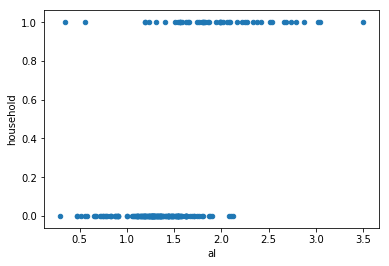

In [23]:
# draw a scatterplot with 'al' in x and 'household' in y axis
# TODO
glass.plot.scatter('al','household')

**Using scikit-learn**

In [31]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
# get X
# TODO
x = glass[feature_cols]
# get y
# TODO
y = glass['household']
# fit
# TODO
logreg.fit(x,y)
# predict
# TODO
pred = logreg.predict(x)
print pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


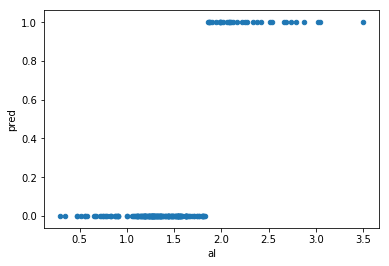

In [32]:
# plot the class predictions
# TODO
glass['pred'] = pred
glass.plot.scatter(x='al', y = 'pred')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [41]:
# store the predicted probabilites of class 1
# TODO
predict_prob = logreg.predict_proba(x)[:,1]
print predict_prob

[0.00149928 0.00184718 0.0031765  0.0031765  0.00375248 0.00462079
 0.00462079 0.00502171 0.00671735 0.0070021  0.00729884 0.00861586
 0.00898037 0.01016808 0.01016808 0.01104497 0.01151106 0.01199657
 0.01357773 0.01414917 0.01414917 0.01668149 0.01668149 0.01738125
 0.01810982 0.01886834 0.01886834 0.019658   0.02838274 0.02838274
 0.03475158 0.03618145 0.03766786 0.03921285 0.04248704 0.04422061
 0.04422061 0.04422061 0.04602151 0.04602151 0.04602151 0.04983472
 0.04983472 0.05185185 0.05185185 0.053946   0.053946   0.05611973
 0.05611973 0.05837563 0.05837563 0.05837563 0.06071638 0.06071638
 0.06071638 0.06071638 0.06071638 0.06071638 0.0631447  0.06566335
 0.06566335 0.06827514 0.07098293 0.07098293 0.07098293 0.07098293
 0.07098293 0.07378959 0.07378959 0.07669808 0.07669808 0.07669808
 0.07971133 0.07971133 0.07971133 0.08283235 0.08283235 0.08283235
 0.08606414 0.08606414 0.08606414 0.08606414 0.08940973 0.08940973
 0.08940973 0.08940973 0.08940973 0.09287216 0.09287216 0.0964

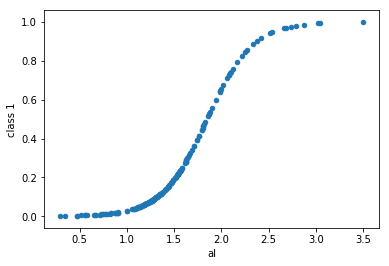

In [42]:
# plot the predicted probabilities
# TODO
glass['class 1'] = predict_prob
glass.plot.scatter(x='al' , y ='class 1')

In [43]:
# examine some example predictions
# TODO (these will work after you have completed the previous steps)
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

**Probability, odds, e, log, log-odds**

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [51]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
# create a table that has two columns 'probability' & 'odds'
#table2 = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]}, {'odds':[]})
# you need to compute odds first 
calc_odd = (table['probability']) / (1 - table['probability'])
print calc_odd
table['odds'] = calc_odd
# and print the table
print table
# TODO

0    0.111111
1    0.250000
2    0.333333
3    1.000000
4    1.500000
5    4.000000
6    9.000000
Name: probability, dtype: float64
   probability      odds
0         0.10  0.111111
1         0.20  0.250000
2         0.25  0.333333
3         0.50  1.000000
4         0.60  1.500000
5         0.80  4.000000
6         0.90  9.000000


# What is **e**? It is the base rate of growth shared by all continually growing processes:

In [108]:
# exponential function: e^1
# TODO
np.exp(1)

2.718281828459045

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [109]:
# time needed to grow 1 unit to 2.718 units
# TODO
np.log(2.718)

0.999896315728952

It is also the **inverse** of the exponential function:

In [110]:
# TODO
print (1/np.log(2.718))

1.0001036950225908


In [113]:
# add log-odds to the table and print
# TODO
table['log-odds'] = np.log(table['odds'])
#print log_odds
print table

   probability      odds  log-odds
0         0.10  0.111111 -2.197225
1         0.20  0.250000 -1.386294
2         0.25  0.333333 -1.098612
3         0.50  1.000000  0.000000
4         0.60  1.500000  0.405465
5         0.80  4.000000  1.386294
6         0.90  9.000000  2.197225


**Logistic Regression from scratch**

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

In [120]:
# compute predicted log-odds for al=2 using the equation
# TODO
#pred_log_odds = table['probability'] + (table['odds'] * 2)
#print pred_log_odds
logodds = logreg.intercept_ + logreg.coef_[0] * 2
print logodds

[0.64722323]


In [122]:
# convert log-odds to odds
# TODO
# take the exponetial of the log-odds 
odds = np.exp(logodds)
print odds

[1.91022919]


In [123]:
# convert odds to probability
# TODO
#find pi using the formula above
pi = (odds / (1 + odds))
print pi

[0.65638445]


In [127]:
# compute predicted probability for al=2 using the predict_proba method
# TODO
print logreg.predict_proba(2)[:,1]

[0.65638445]


In [128]:
# examine the coefficient for al
# TODO
print logreg.coef_[0]

[4.18040386]


**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [131]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
# compute logodds, odds, prob, and then print the prob
# TODO
logodds1 = logreg.intercept_ + logreg.coef_[0] * 3
print logodds1
odds1 = np.exp(logodds)
print odds1
pi1 = (odds1 / (1 + odds1))
print pi1

[4.82762709]
[124.91419871]
[0.99205808]


In [132]:
# compute predicted probability for al=3 using the predict_proba method
# TODO
print logreg.predict_proba(3)[:,1]

[0.99205808]


**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [134]:
# examine the intercept
# TODO
print logreg.intercept_

[-7.71358449]


**Interpretation:** For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [136]:
# convert log-odds to probability
# TODO
logodds2 = logreg.intercept_ + logreg.coef_[0] * 0
print logodds2
odds2 = np.exp(logodds2)
print odds2
pi2 = (odds2 / (1 + odds2))
print pi2

[-7.71358449]
[0.00044672]
[0.00044652]
